In [3]:
words = open('names.txt', 'r').read().splitlines()

In [4]:
max(len(w) for w in words)

15

In [5]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1 

In [6]:
sorted(b.items(), key = lambda kv : -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [7]:
import torch

In [8]:
N = torch.zeros((27, 27), dtype=torch.int32)

In [9]:
chars = sorted(set(''.join(words)))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [10]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color="grey")
        plt.text(j, i, N[i, j].item(), ha= "center", va="top", color="grey")
plt.axis('off');

In [ ]:
N[0]

In [13]:
p=N[0].float()
p /= p.sum()
p

In [14]:
g = torch .Generator().manual_seed(2147483647)
ix = (torch.multinomial(p, num_samples=1, replacement=True, generator=g)).item()
itos[ix]

'm'

In [15]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p = p / p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [16]:
torch.multinomial(p, num_samples=100, replacement=True, generator=g)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0,
        0, 1, 1, 1])

In [17]:
P = (N+1).float() # model smoothning ~ avoid "inf"
P /= P.sum(1, keepdims=True)

In [18]:
#torch.multinomial(p, num_samples=100, replacement=True, generator=g).sort()

In [19]:
g = torch .Generator().manual_seed(2147483647)
for i in range(5):
    out = []
    ix = 0

    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.


In [20]:
# GOAL: maximize likelihood of the data w.r.t. model parameters (statistical modeling)
# equivalent to maximizing the log likelihood (because log is monotonic)
# equivalent to minimizing the negative log likelihood
# equivalent to minimizing the average negative log likelihood

# log(a*b*c) = log(a) + log (b) + log(c)

In [52]:
log_likelihood = 0.0
n = 0

for w in ["andrejq"]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        print(f'{ch1}{ch2}: {prob:.4f} : {logprob:.4f}')
print(f'{log_likelihood = }')
negative_log_likelihood = - log_likelihood
print(f'{negative_log_likelihood = }')
print(f'{negative_log_likelihood/n}') #loss function will be this negative log liklihood / n ~ average ~ loss is 3.12 as we see
# loss function lower it is near to "0" better it ism,, as greater it will be worse

.a: 0.1376 : -1.9835
an: 0.1604 : -1.8302
nd: 0.0384 : -3.2594
dr: 0.0770 : -2.5646
re: 0.1334 : -2.0143
ej: 0.0027 : -5.9004
jq: 0.0003 : -7.9817
q.: 0.0970 : -2.3331
log_likelihood = tensor(-27.8672)
negative_log_likelihood = tensor(27.8672)
3.4834020137786865


In [53]:
# create the training set of bigrams (x,y)
xs, ys = [], []

for w in words[:1]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    print(ch1, ch2)
    xs.append(ix1)
    ys.append(ix2)
    
xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [54]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float() # making it float because nn take float value
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [55]:
xenc.shape

torch.Size([5, 27])

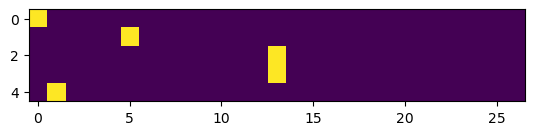

In [56]:
plt.imshow(xenc)

In [57]:
xenc.dtype

torch.float32

In [58]:
W = torch.randn(27, 27)
xenc @ W # matrix multiplication '@'
# xenc(5, 27) @ W (27, 1) -> (5, 27)

tensor([[ 0.4505, -1.6007,  1.6492,  0.3954, -0.4181,  0.2342,  0.6742,  1.5830,
          0.0346, -0.5384,  0.3755, -0.2893, -1.2543,  0.2504,  0.8800,  0.4136,
          1.1604, -0.7875,  0.2273,  0.4753, -0.2425,  0.6726, -0.8099, -0.3300,
          1.5286,  0.6358,  0.0910],
        [-0.2244,  1.1071, -0.4648, -1.2734,  0.0377, -0.1837,  1.1401,  0.3705,
          1.0338,  0.7495,  0.5812,  0.5848, -0.9489,  1.6277, -1.9734, -1.5882,
         -2.0269, -0.3029,  1.5603, -0.9747,  0.9611, -0.0627,  0.4225, -0.0161,
          1.9314,  0.6215, -0.3455],
        [-0.0346, -0.5317,  2.1502,  0.5591, -1.2480, -0.7820, -0.2638,  0.1098,
         -1.0521,  0.5771,  0.4524, -1.3803,  1.1900,  0.4778, -0.7381, -2.3812,
         -1.1748, -1.2859,  0.6157, -1.8791,  1.7473, -0.2978, -0.4295, -1.0269,
          0.0842,  0.7971, -1.4743],
        [-0.0346, -0.5317,  2.1502,  0.5591, -1.2480, -0.7820, -0.2638,  0.1098,
         -1.0521,  0.5771,  0.4524, -1.3803,  1.1900,  0.4778, -0.7381, -2.3812

In [59]:
logits = xenc @ W # log-counts
counts = logits.exp() # equivalent N
probs = counts / counts.sum(1, keepdims=True)
probs

tensor([[0.0352, 0.0045, 0.1168, 0.0333, 0.0148, 0.0284, 0.0441, 0.1093, 0.0232,
         0.0131, 0.0327, 0.0168, 0.0064, 0.0288, 0.0541, 0.0340, 0.0716, 0.0102,
         0.0282, 0.0361, 0.0176, 0.0440, 0.0100, 0.0161, 0.1035, 0.0424, 0.0246],
        [0.0170, 0.0643, 0.0134, 0.0059, 0.0221, 0.0177, 0.0665, 0.0308, 0.0598,
         0.0450, 0.0380, 0.0381, 0.0082, 0.1082, 0.0030, 0.0043, 0.0028, 0.0157,
         0.1012, 0.0080, 0.0556, 0.0200, 0.0324, 0.0209, 0.1466, 0.0396, 0.0150],
        [0.0257, 0.0156, 0.2286, 0.0466, 0.0076, 0.0122, 0.0205, 0.0297, 0.0093,
         0.0474, 0.0419, 0.0067, 0.0875, 0.0429, 0.0127, 0.0025, 0.0082, 0.0074,
         0.0493, 0.0041, 0.1528, 0.0198, 0.0173, 0.0095, 0.0290, 0.0591, 0.0061],
        [0.0257, 0.0156, 0.2286, 0.0466, 0.0076, 0.0122, 0.0205, 0.0297, 0.0093,
         0.0474, 0.0419, 0.0067, 0.0875, 0.0429, 0.0127, 0.0025, 0.0082, 0.0074,
         0.0493, 0.0041, 0.1528, 0.0198, 0.0173, 0.0095, 0.0290, 0.0591, 0.0061],
        [0.0130, 0.0462,

In [60]:
probs[0].shape

torch.Size([27])

In [61]:
probs[0]

tensor([0.0352, 0.0045, 0.1168, 0.0333, 0.0148, 0.0284, 0.0441, 0.1093, 0.0232,
        0.0131, 0.0327, 0.0168, 0.0064, 0.0288, 0.0541, 0.0340, 0.0716, 0.0102,
        0.0282, 0.0361, 0.0176, 0.0440, 0.0100, 0.0161, 0.1035, 0.0424, 0.0246])

In [62]:
probs[0].sum()

tensor(1.)

In [63]:
xs

tensor([ 0,  5, 13, 13,  1])

In [64]:
ys

tensor([ 5, 13, 13,  1,  0])

In [65]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g)

In [66]:
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
# btw: the last 2 lines here are together called a 'softmax'

In [67]:
probs.shape

torch.Size([5, 27])

In [68]:
nlls = torch.zeros(5)
for i in range(5):
  # i-th bigram:
  x = xs[i].item() # input character index
  y = ys[i].item() # label character index
  print('--------')
  print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
  print('input to the neural net:', x)
  print('output probabilities from the neural net:', probs[i])
  print('label (actual next character):', y)
  p = probs[i, y]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual next character): 5
probability assigned by the net to the the correct character: 0.012286253273487091
log likelihood: -4.3992743492126465
negative log likelihood: 4.3992743492126465
--------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
label (actual next character): 13
probability assigned by the net to the the correct character:

In [69]:
xs

tensor([ 0,  5, 13, 13,  1])

In [70]:
ys

tensor([ 5, 13, 13,  1,  0])

In [71]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [72]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
loss = -probs[torch.arange(5), ys].log().mean()

In [73]:
print(loss.item())

3.7693049907684326


In [74]:
# backward pass
W.grad = None # set to zero the gradient
loss.backward()

In [75]:
W.data += -0.1 * W.grad

In [81]:
# create the dataset
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  228146


In [82]:
# gradient descent
for k in range(1):
  
  # forward pass
  xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
  print(loss.item())
  
  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()
  
  # update
  W.data += -50 * W.grad

3.768618583679199


In [83]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  
  out = []
  ix = 0
  while True:
    
    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------
    
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

rtpa.
zxckqrixttszslw.
ouinpcet.
jc.
rlpxqvyduslbt.
